# 可視化手法のまとめ
pyplot,seaborn,pandasのグラフ描画の違いを理解する  

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

## データの準備

## Boston Housingデータ

In [3]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
display(df.head())

X=df.iloc[:,:df.shape[1]-1]
y=df['MEDV']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Breast Cancer wisconsinのデータセット

In [3]:
import urllib
try:
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                     '/breast-cancer-wisconsin/wdbc.data', header=None)
except urllib.error.URLError:
    df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book/master/code/'
                     'datasets/wdbc/wdbc.data', header=None)
print('rows, columns:', df.shape)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=df.iloc[:,2:]
y=df.iloc[:,1]
y=le.fit_transform(y)
# カテゴリ変数を数値データに変える
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
df.head()

rows, columns: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Matplotlib チートシート

## plt.xlim(0, 10)   plt.ylim(0,10)
X,Y軸の表示範囲を選択する

## fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(4,6))
１行２列のサブプロットを作成
## ax[0].plot() ax[1].plot() 
でサブプロットにグラフを描画する

## plt.subplot(2,2,1)
でサブプロットの位置指定をしてから、plt.plot()でグラフを書くこともできる  
こっちのほうが柔軟にサブプロットの数を調整できるが、plotの順番に気をつけないといけない

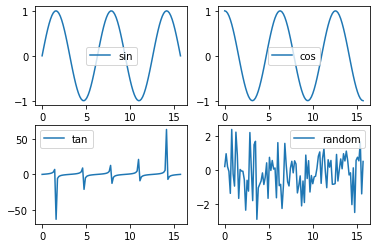

In [19]:
import numpy as np
x = np.linspace(0, 5*np.pi, 100)
 
y_sin = np.sin(x)
y_cos = np.cos(x)
y_tan = np.tan(x) 
y_random = np.random.randn(len(y_tan))

# １つ目のプロット
plt.subplot(2,2,1)
plt.plot(x, y_sin, label="sin")
plt.legend()
 
# 2つ目のプロット
plt.subplot(2,2,2)
plt.plot(x, y_cos, label="cos")
plt.legend()
 
# 3つ目のプロット
plt.subplot(2,2,3)
plt.plot(x, y_tan, label="tan")

plt.legend()
 
# 4つ目のプロット
plt.subplot(2,2,4)
plt.plot(x, y_random, label="random")
plt.legend()

plt.show()

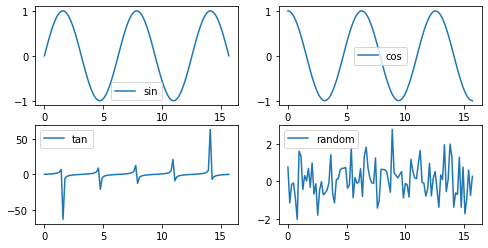

In [18]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(8,4))

ax[0][0].plot(x, y_sin, label="sin")
ax[0][0].legend()

ax[0][1].plot(x, y_cos, label="cos")
ax[0][1].legend()

ax[1][0].plot(x, y_tan, label="tan")
ax[1][0].legend()

ax[1][1].plot(x, y_random, label="random")
ax[1][1].legend()

plt.show()

## plt.plot(X,Y)
一番シンプルな折れ線グラフを表示してくれる。入力データがSeriesタイプなら、x,yを指定しなくてもグラフ表示してくれるので凶悪

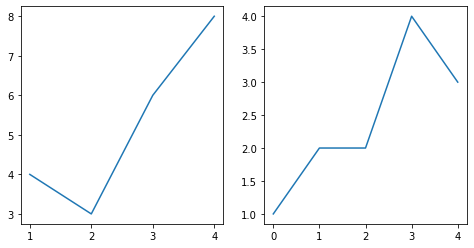

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
X=[1,2,3,4]
Y=[4,3,6,8]
ax[0].plot(X,Y)

sr=pd.Series([1,2,2,4,3])
ax[1].plot(sr)
plt.show()


## plt.step(X,Y,where='mid')
階段状のグラフを作ることができる。累積和など、段階的に大きくなるデータの可視化に便利  
where='mid','pre','post'でステップの場所を決められる。　midが無難な感じがする

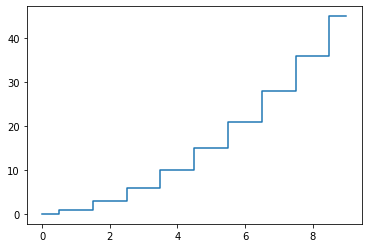

In [24]:
X=[i for i in range(10)]
y=np.cumsum(X)
plt.step(X,y,where='mid')
plt.show()

## plt.bar(X,Y,color='red',align='center',alpha=0.5)
基本中の基本、棒グラフを表示する。alignで棒の位置、alphaで色の透明度を調整できる

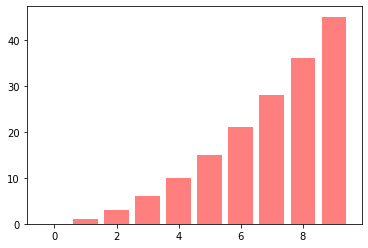

In [21]:
plt.bar(X,y,color='red',alpha=0.5)
plt.show()

## plt.fill_between(X,y+std,y-std)
y+stdとy-stdの間を色埋めする。学習曲線での広がりを描画するのに便利

## plt.xscale('log')
X軸を常用対数スケールで表示する。

## plt.grid(which="major",axis="y",color="green",alpha=0.8,linestyle="--",linewidth=1)
which {'major' (主目盛線), 'minor' (補助目盛線), 'both' (両目盛)} 

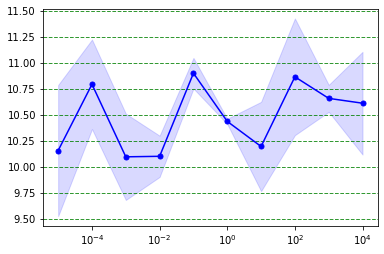

In [38]:
X=[10**i for i in range(-5,5)]
y=np.array([10+i for i in np.random.rand(10)])
std=np.array([i for i in np.random.rand(10)])
plt.plot(X,y,color='blue',marker='o',markersize=5)
plt.fill_between(X,y+std,y-std,color='blue',alpha=0.15)
plt.grid(which="major",axis="y",color="green",alpha=0.8,linestyle="--",linewidth=1)
plt.xscale('log')
plt.show()

## plt.matshow(confmat,cmap=plt.cm.Blue,alpha=0.3)
ヒートマップ図を作成できる。混合行列を描画するときに便利。seabornのように図中に数値を入れてくれないので、自分で入れる必要がある。  

## plt.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
x,yの座標に文字列sを入れることができる。va,haは文字列の位置調整？

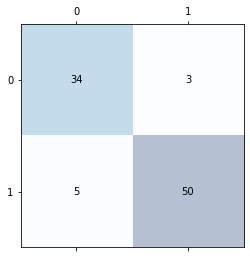

In [9]:
confmat=np.array([[34,3],
                 [5,50]])
plt.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        plt.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
plt.show()

## plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
x軸、y軸に平行な直線を表示する lwで線の太さを指定。

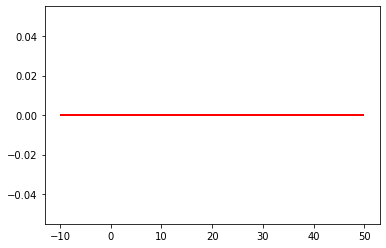

In [7]:
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## plt.scatter(x,y,s=100, c=value, cmap='Blues',marker='s')
散布図を表示する. c=valueの値に応じて濃淡を分けて表示する。plt.colorbar()でカラーバーを表示する。

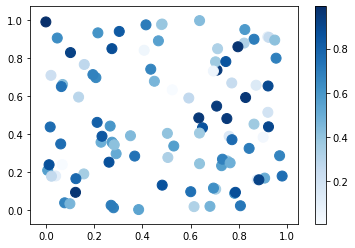

In [21]:
x = np.random.rand(100)
y = np.random.rand(100)
value = np.random.rand(100)
plt.scatter(x,y,s=100, c=value, cmap='Blues',marker='o')
plt.colorbar()
plt.show()   

## plt.hist(X,bins=10,normed=True,histtype='bar',log=False,stacked=False)
pyplotでヒストグラムを表示。binsで表示する棒（ビン）の数を指定。normedで正規化してくれる。histtypeで形状を指定。logで縦軸を対数目盛にする。stackedで積み上げヒストグラムにする

(array([0.00724638, 0.01515152, 0.02766798, 0.03293808, 0.05533597,
        0.06719368, 0.04808959, 0.01778656, 0.01646904, 0.01383399,
        0.00988142, 0.00131752, 0.00461133, 0.00329381, 0.01251647]),
 array([ 5.,  8., 11., 14., 17., 20., 23., 26., 29., 32., 35., 38., 41.,
        44., 47., 50.]),
 <a list of 15 Patch objects>)

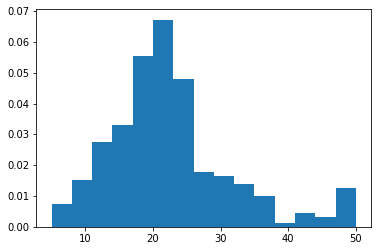

In [82]:
# Boston housing
plt.hist(y,bins=15,normed=True)

# Seaborn チートシート

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display

## sns.set(style='whitegrid',context='notebook')
グラフの見た目をスタイリッシュに変えることができる。matplotlibの画像すべてに当てはまる。  

## sns.despine
軸の除去

## 散布図行列

## sns.pairplot( df , vars=cols, hue='class',palette='Blues' ,markers='s',size=2.5)
データ可視化で真っ先にやるべきpairplot表示。データセットの特徴量のペアに対する相関関係を一つにまとめられるので便利  
hueにカテゴリデータの列名を渡すと、クラスごとに色分けしてくれる varsにカラム名のリストを渡すことで、表示数r特徴量を指定することができる。

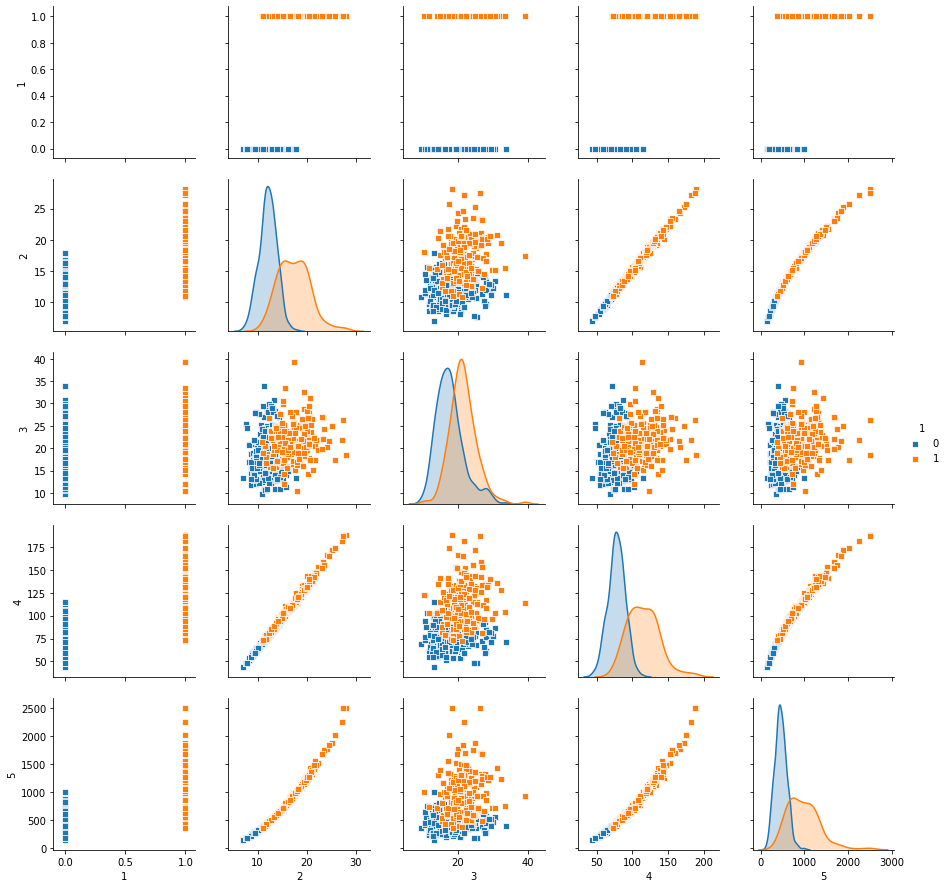

In [5]:
# Breast Cancerデータ
cols=[1,2,3,4,5]
sns.pairplot(df.iloc[:,cols],hue=1,markers='s',size=2.5)
plt.show()

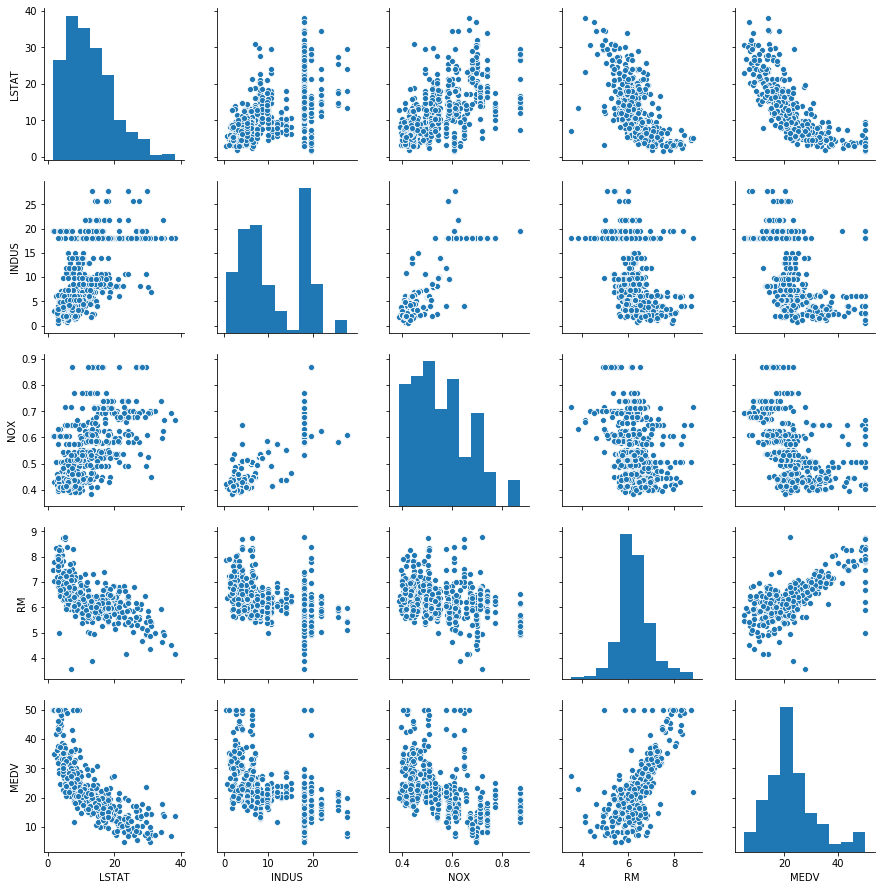

In [8]:
# Boston Housing データ
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df,vars=cols,size=2.5)
plt.show()

## ヒートマップ図

## sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
ヒートマップ図を簡単に表示してくれる。cmに行列を入れる必要があり、大体ピアソンの積率相関係数を入れて、特徴量の線形相関関係を表すのに使う。  
cbarでカラーバーの表示、annotでデータ値の表示、squareで各短形の正方形化、fmtで数値の表示形式。annot_kwsでデータ値のサイズの設定、  
回帰問題の場合は注目すべきは、目的変数との相関が高い特徴量で、１に近いほど両社に線形関係がある。

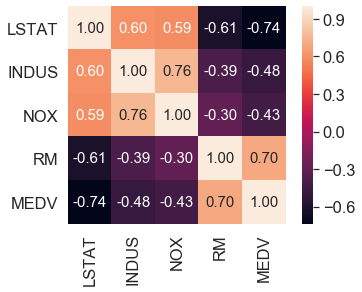

In [11]:
# Boston Housing データ
cols=['LSTAT','INDUS','NOX','RM','MEDV']
# ピアソンの積率相関係数を求める
cm=np.corrcoef(df[cols].values.T)

sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

## ヒートマップ図で欠損値の分布を確認
### sns.heatmap(df.isnull,cbar=False)

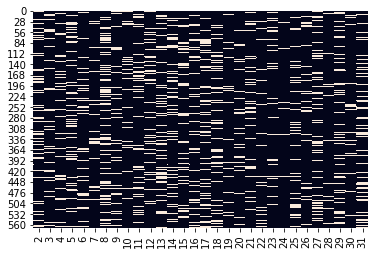

In [24]:
# Boston Housingデータ
X_null=X
# わざと欠損地を作成
for i in range(X.shape[1]):
    num=np.random.randint(0,100,1)
    null=np.random.randint(0,X.shape[0],num)
    X_null.iloc[null,i]=None
sns.heatmap(X_null.isnull(),cbar=False)
plt.figsize=(5,8)
plt.show()

## missingnoによる欠損可視化
## missingno.matrix(df,figsize=(20,14),color=(0.5,0,0))
import missingnoする。そのままデータフレーム形を入れていいので、非常に簡単  
右バーは各行ごとの非欠損値の個数を線グラフで表したもの
## missingno.heatmap(df)
各列の欠損値の発生個所の相関を表示。非常に便利

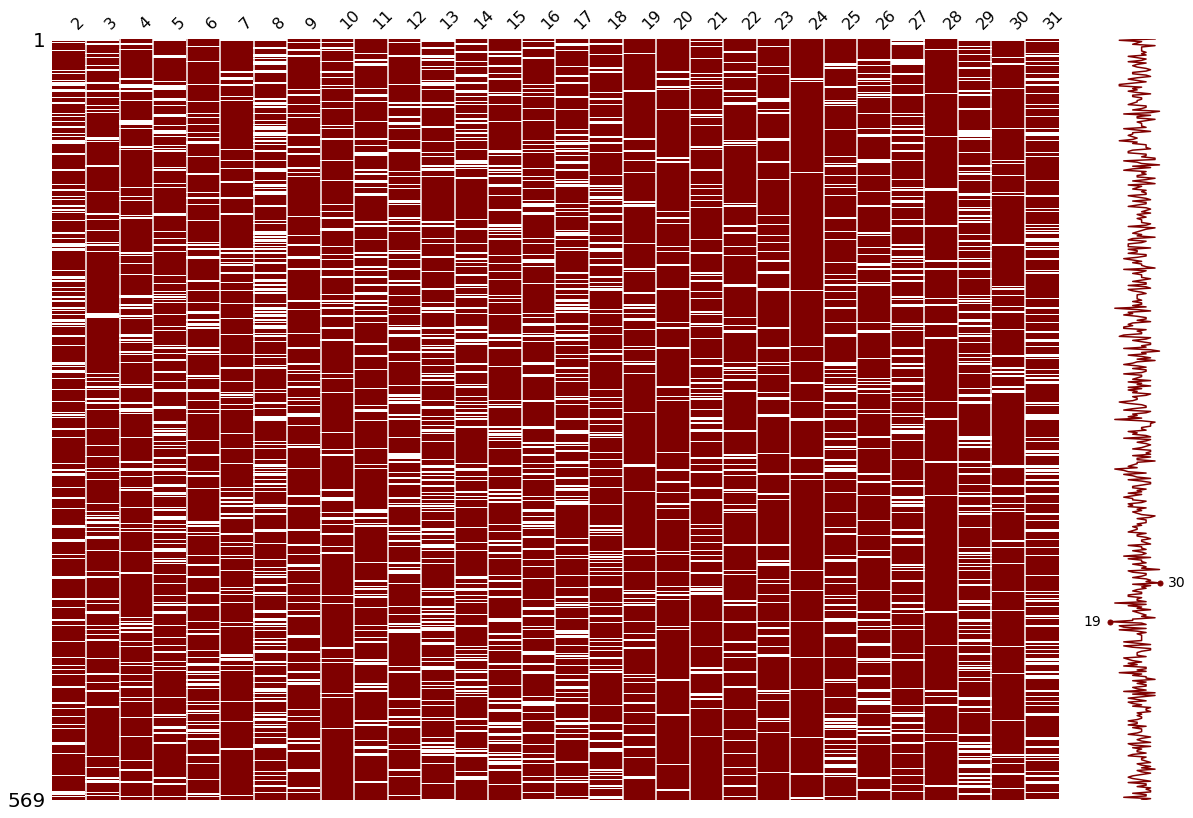

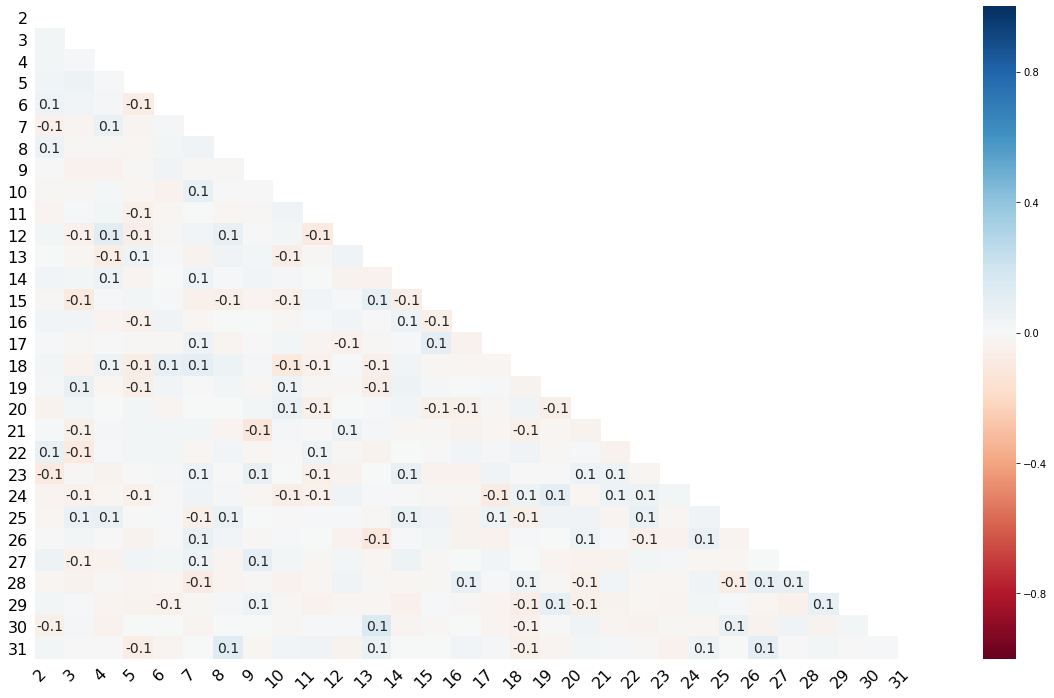

In [34]:
import missingno
missingno.matrix(X_null,figsize=(20,14),color=(0.5,0,0))
missingno.heatmap(X_null) 

## sns.distplot(y)
ヒストグラムを表示。回帰問題の訓練データでの目的変数の表示に便利  
### 正規分布に乗っていない場合、対数変換を行うと、正規分布に(大体)のることがある

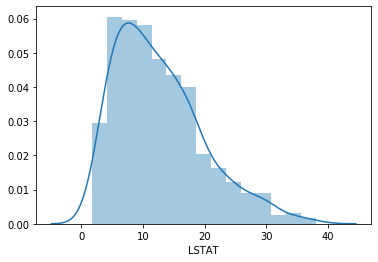

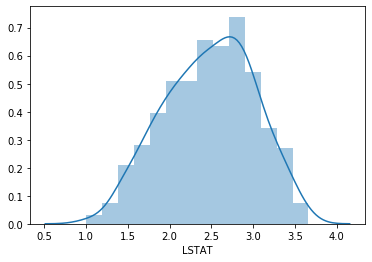

In [75]:
# BostonHousing データ
sns.distplot(X["LSTAT"])
plt.show()
X_log=np.log1p(X['LSTAT'])
sns.distplot(X_log)
plt.show()

## sns.barplot(x=X,y=y,orient='h')
スタイリッシュな棒グラフを表示する。orientで棒グラフの向きを指定。hで水平,cで垂直  
ランダムフォレストやXGBoostなどで重要な特徴量を可視化する時に役に立つ

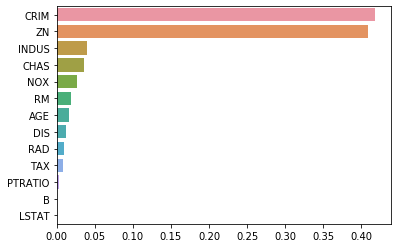

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)
importane=forest.feature_importances_
indices=np.argsort(importane)[::-1]
sns.barplot(x=importane[indices],y=df.columns.values[:-1],orient='h')
plt.show()

## sns.boxplot(x='col',y='col2', data=data)
数値データのばらつきを可視化するのに便利、dataにデータフレームを入れて、xにカラム名、yに数値データのカラム名を指定する。  
seaborn全判に言えることだが、hueでカテゴリデータを指定できる

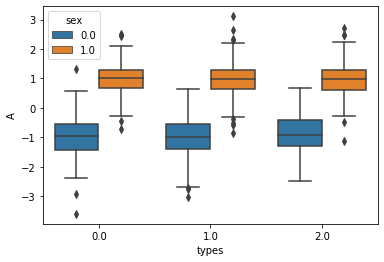

In [29]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=2, n_classes=2)
data = np.c_[np.c_[x, y], np.random.binomial(2, .5, len(x))]
data = pd.DataFrame(data).rename(columns={0:'A', 1:'B', 2:'sex', 3:'types'})

sns.boxplot(x='types',y='A',hue='sex',data=data)
plt.show()

## sns.violinplot(x='col',y='col2',hue='class',data=data,split=True)
バイオリンプロット.boxplotとど言うように数値データの非がりを可視化する。データの分布の密度を確認でき、重宝する

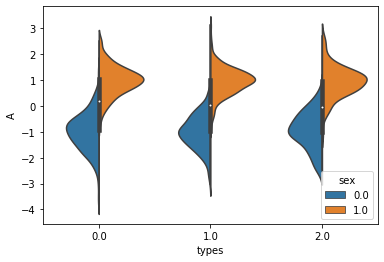

In [35]:
sns.violinplot(x='types',y='A',hue='sex',data=data,split=True)
plt.show()

## sns.jointplot(x="col", y="ol2", data=df)
ヒストグラム付きの散布図を表示する。通常の散布図より最頻値や分布の状況を簡単に理解できる

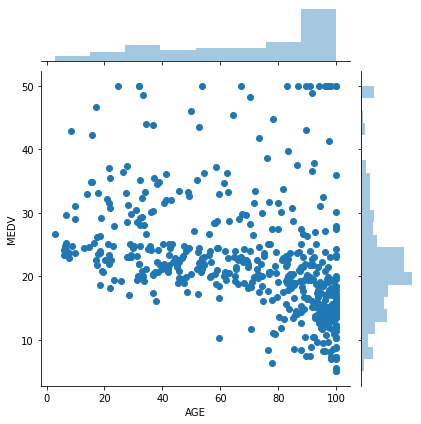

In [11]:
sns.jointplot(x='AGE',y='MEDV',data=df)
plt.show()

## sns.stripplot(x='col1', y='target', data=df)
分布プロットを表示する。特徴量の要素ごとに、ターゲット変数がどのように分布しているかを把握するのに便利

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


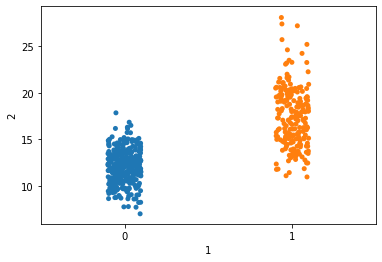

In [9]:
sns.stripplot(x=1,y=2,data=df)

## sns.countplot(x='col', data=df, hue='col2')
指定したカラムにある、uniqueな要素の数を棒グラフであらわす  
categorical_特徴量や、分類問題の解きにターゲット特徴量の分布を知るのに便利  
hueで指定した特徴量の要素ごとでのカウントを行える。二値分類に便利

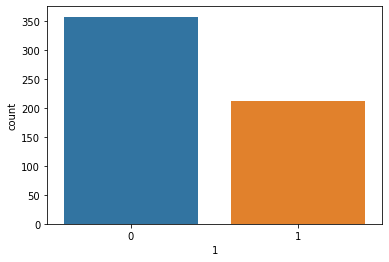

In [4]:
sns.countplot(x=1,data=df)
plt.show()

## ユニークな特徴量の数を描画

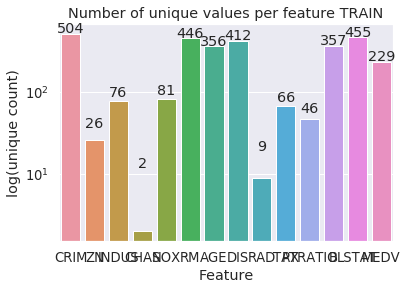

In [16]:
uniques = [len(df[col].unique()) for col in df.columns]
sns.set(font_scale=1.2)
ax = sns.barplot(df.columns, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature TRAIN')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

## seabornとsubplotsを組み合わせる
### sns.barplo(x="AGE", y="MEDV", data=df, ax=axes[0], palette="rocket")
pyplotのsubplotをseabornに組み合わせるには、axでサブプロットを指定する

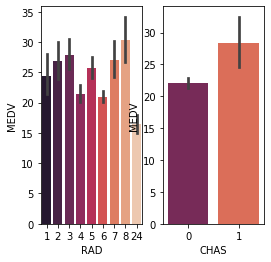

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(4,4))
sns.barplot(x="RAD", y="MEDV", data=df, ax=ax[0], palette="rocket")
sns.barplot(x="CHAS", y="MEDV", data=df, ax=ax[1], palette="rocket")
plt.show()

# Pandasチートシート

## df['col'].hist(bins=20)
ヒストグラムをお手軽に作成

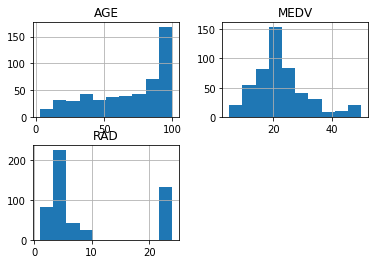

In [6]:
df[['MEDV','AGE','RAD']].hist()
plt.show()

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## df.plot(kind='barh',figsize=(15,5))     df.plot.barh()
pandasの描画メソッド。横棒グラフを表示してくれる。kindに様々なグラフの種類をいれることでも、描けるし、plotの後に表示したいグラフのメソッドを入れても良い

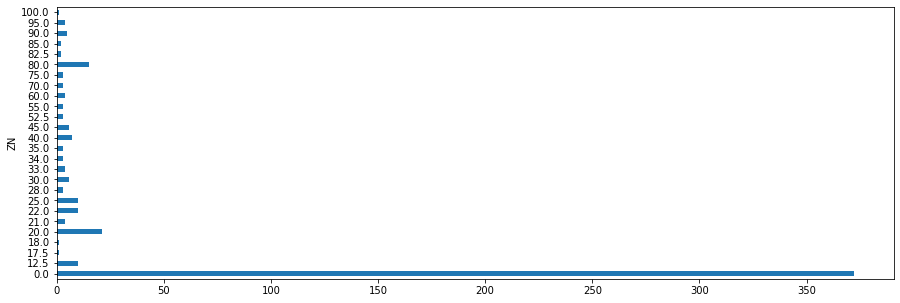

In [25]:
# 予め、求めたい特徴量の数をカウントする
bar_df=df.groupby('ZN').count()['CRIM']
bar_df.plot(kind='barh',figsize=(15,5))
plt.show()

## ２つの特徴量間での簡単なプロット

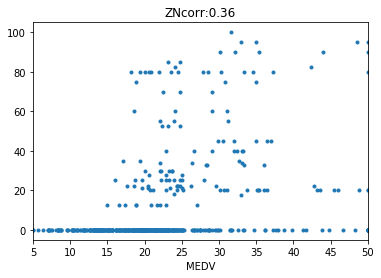

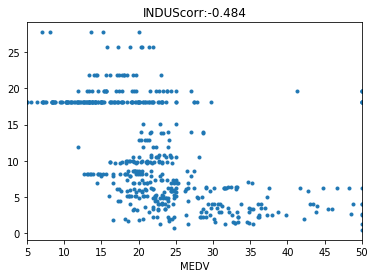

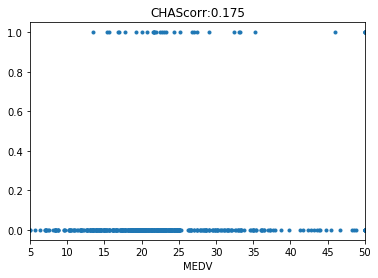

In [12]:
cols=df.columns[1:4]
for col in cols:
    cor=np.corrcoef(df[col],df['MEDV'])[0,1]
    df.set_index('MEDV')[col].plot(style='.',title=col+'corr:'+str(round(cor,3)))
    plt.show()

## matplotlibのsubplotと、Pandasの合わせ技

## fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,6))
###  df['col'].plot(kind='hist', bins=100, ax=ax1)
subplotをaxに指定することで、特定の位置にサブプロットを挿入することが可能

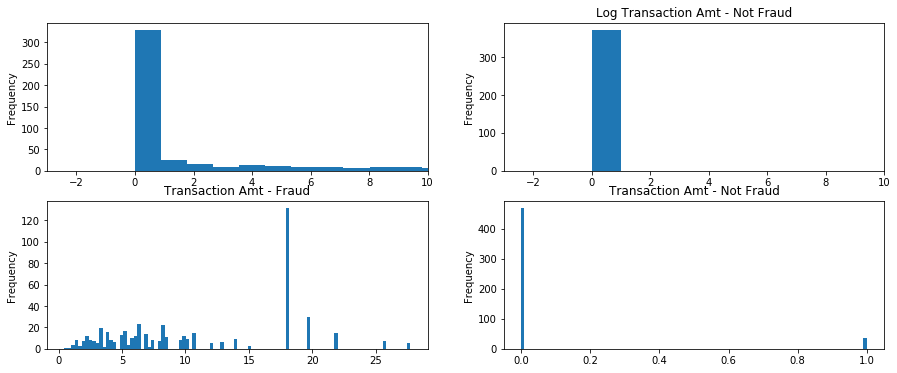

In [32]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,6))
df['CRIM'].plot(kind='hist',
          bins=100,
          xlim=(-3, 10),
         ax= ax1)
df['ZN'].plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Not Fraud',
          xlim=(-3, 10),
         ax=ax2)
df['INDUS'].plot(kind='hist',
          bins=100,
          title='Transaction Amt - Fraud',
         ax= ax3)
df['CHAS'].plot(kind='hist',
          bins=100,
          title='Transaction Amt - Not Fraud',
         ax=ax4)
plt.show()


## statsmodels.api
周期的なデータを可視化するのに便利なモジュール

## import statsmodels.api as sm
## res=sm.tsa.seasonal_decompose(X,freq=90)
### fig=res.plot()
Xが時系列データになる。freqで、データの周期を指定する  
trend(傾向),seasonal(季節性),resid(残差)にそれぞれの数値が入っている

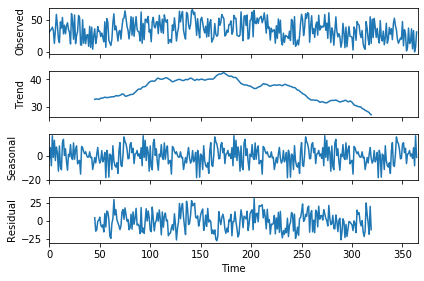

In [20]:
# 適当にノイズを加えた時系列データの作成
x = np.arange(0, 365)
y1 = np.sin(0.1*x)*5
y2 = np.sin(1*x)+5
y3 = np.sin(0.01*x)*10
n = np.random.rand(len(x))*50
y = y1 + y2  + y3+ n
import statsmodels.api as sm
res=sm.tsa.seasonal_decompose(y,freq=90)
fig=res.plot()
